In [ ]:
#General Packages
import pandas as pd

#Statistical tests
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Plot
import seaborn as sns
import matplotlib.pyplot as plt


In [124]:
df = pd.read_csv("C:\\Users\\celin\\OneDrive\\DTU\\4. Semester\\Fag projekt\\AdversarialAttacks\\results\\generation_metadata.csv")
df.head()


,model,attack,first_success_iter,iterations,true_class,target_class,original_pred_class,adversarial_pred_class,first_success_prob_distribution,final_prob_distribution,dataset_index,attack_successful,psnr_score,ssim_score,ergas_score,adversarial_image_path
0,cifar10_resnet20,fgsm,2.0,40,0,1,0,1,"[0.029150718823075294, 0.8751784563064575, 0.0...","[9.638422979264656e-17, 1.0, 2.370962480488422...",3,True,23.039158,0.956238,11.842161,./generated_adversarial_images\adv_cifar10_fgs...
1,cifar10_resnet20,fgsm,1.0,40,0,2,0,2,"[0.20175372064113617, 0.0017717956798151135, 0...","[9.877204331971074e-23, 4.443404830152634e-22,...",3,True,22.900070,0.948870,12.206505,./generated_adversarial_images\adv_cifar10_fgs...
2,cifar10_resnet20,fgsm,2.0,40,0,3,0,3,"[0.0003567191306501627, 0.0001677404361544177,...","[4.900408911163362e-20, 7.382444149133136e-20,...",3,True,23.059444,0.950538,12.142895,./generated_adversarial_images\adv_cifar10_fgs...
3,cifar10_resnet20,fgsm,4.0,40,0,4,0,4,"[0.10972924530506134, 0.011258787475526333, 0....","[5.251823889429295e-18, 4.090483402510464e-18,...",3,True,22.571117,0.947011,12.519701,./generated_adversarial_images\adv_cifar10_fgs...
4,cifar10_resnet20,fgsm,4.0,40,0,5,0,5,"[0.15858368575572968, 0.01836896874010563, 0.1...","[1.900681455486216e-14, 4.333542530897405e-14,...",3,True,22.764820,0.953140,12.413564,./generated_adversarial_images\adv_cifar10_fgs...


In [125]:
len(df['dataset_index'].unique())

20

In [ ]:
# Define and fit the model
model = smf.mixedlm("psnr_score ~ attack * C(target_class)", df, groups=df["dataset_index"])
result = model.fit()

# Print the summary
print(result.summary())


                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        psnr_score
No. Observations:         360            Method:                    REML      
No. Groups:               20             Scale:                     0.0798    
Min. group size:          18             Log-Likelihood:            -146.6451 
Max. group size:          18             Converged:                 Yes       
Mean group size:          18.0                                                
------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                          22.057    0.464  47.544 0.000 21.148 22.966
attack[T.pgd]                      15.947    0.094 169.350 0.000 15.762 16.131
C(target_class)[T.1]               -0.005    0.094  -0.052 0.959 -0.190  

Pairwise post-hoc tests: 

In [134]:
tukey = pairwise_tukeyhsd(endog=df['psnr_score'],
                          groups=df['attack'],
                          alpha=0.05)

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  fgsm    pgd  15.9073   0.0 15.4859 16.3287   True
---------------------------------------------------


In [135]:
for target in df['target_class'].unique():
    print(f"\nTarget class: {target}")
    tukey = pairwise_tukeyhsd(endog=df[df['target_class'] == target]['psnr_score'],
                              groups=df[df['target_class'] == target]['attack'],
                              alpha=0.05)
    print(tukey.summary())


Target class: 1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  fgsm    pgd  15.9042   0.0 14.4385 17.3698   True
---------------------------------------------------

Target class: 2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  fgsm    pgd  16.1162   0.0 14.6929 17.5396   True
---------------------------------------------------

Target class: 3
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  fgsm    pgd  15.9665   0.0 14.5389 17.394   True
--------------------------------------------------

Target class: 4
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------


C:\Users\celin\AppData\Local\Temp\ipykernel_1568\57064206.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='target_class', y='psnr_score', hue='attack', ci='sd')


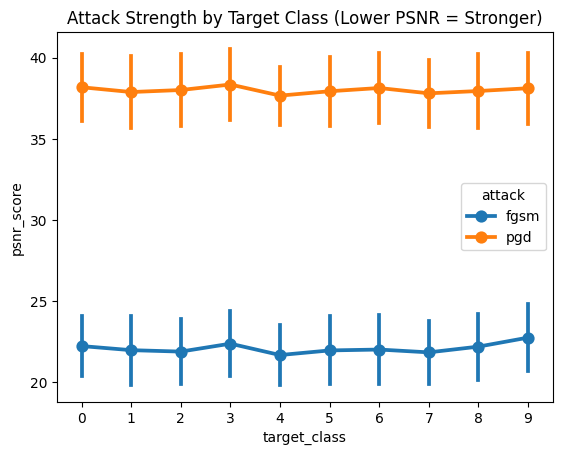

In [ ]:
sns.pointplot(data=df, x='target_class', y='psnr_score', hue='attack', ci='sd')
plt.title("Attack Strength by Target Class (Lower PSNR = Stronger)")
plt.show()